# TMDB Data Analysis (Data Wrangling, Exploratory Data Analysis)

What causes a movie to be successful? Does it need a high budget? Does it need the most famous actors? Perhaps the genre is the most important factor. 

This project seeks to answer such questions and more as we will analyze a data set to find relationships between the success of a movie and its associated variables (such as budget, cast, genre, etc.) 

We will be analying a data set that has 4,814 movies up to the year 2016.

Data set: https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata

While the data sets have many columns, these are the ones we will be looking at the most:

There are two data sets and we will join them together.

The first data set has:

- __movie_id__: A unique number that identifies a movie
- __cast__: The name of the actors in the movie
- __crew__: The name of the director, editor, etc. (We will only look at the director)

The second data set has:

- __id__: Same as movie_id in the first data set
- __budget__: The budget of the movie
- __revenue__: The amount of money a movie earned globally
- __genre__: The genre of the movie (action, adventure, etc.)
- __original_title__: The title of a movie before translation or adaptation
- __release_date__: The date a movie released (We will make a new column called release_year based off this)
- __vote_average__: the average rating of a movie (from TMDB users)
- __vote_count__: the number of votes a movie received (from TMDB users)

## Table of Contents

- Questions
- Data Wrangling
- Exploratory Data Analysis
- Conclusions
- References

## Questions

- Question 1: What is the movie that earned the highest revenue?


- Question 2: What was the most expensive movie to make?


- Question 3: What was the most profitable movie?


- Question 4: Is there a relationship between budget and profit/revenue? If a movie has a higher budget, will it lead to higher profit and revenue?


- Question 5: What are the top movies by score?


- Question 6: Which director makes the movies with the highest average profit?


- Question 7: Which actors bring in the most revenue and profit?


- Question 8: Which genres make the highest revenue and profit?



In [94]:
# Import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import CSV

df1 = pd.read_csv(r'D:\PortfolioProject\tmdb_5000_credits.csv')
df2 = pd.read_csv(r'D:\PortfolioProject\tmdb_5000_movies.csv')


In [95]:
df1.columns = ['id', 'title2', 'cast', 'crew']
df2 = df2.merge(df1, on='id')

In [96]:
df2.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,title2,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [97]:
# Looking at information of data set

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

## Data Wrangling

### Look for duplicates to drop

In [98]:
# Check for duplicates

df2.duplicated().sum()

0

There are no duplicates.

### Look for missing values

Using percentages shows us how much of each column has missing values.

In [99]:
# Check for missing values using percentages

df2.isnull().sum()/len(df2)*100

budget                   0.000000
genres                   0.000000
homepage                64.355611
id                       0.000000
keywords                 0.000000
original_language        0.000000
original_title           0.000000
overview                 0.062461
popularity               0.000000
production_companies     0.000000
production_countries     0.000000
release_date             0.020820
revenue                  0.000000
runtime                  0.041641
spoken_languages         0.000000
status                   0.000000
tagline                 17.572351
title                    0.000000
vote_average             0.000000
vote_count               0.000000
title2                   0.000000
cast                     0.000000
crew                     0.000000
dtype: float64

### Dropping columns

Dropping columns such as homepage (website of respective movie), status (says "Released" for every movie), tagline (slogan for each movie), and others we will not be analyzing.

In [100]:
# Dropping columns

df2.drop(['homepage', 'status', 'tagline', 'overview', 'spoken_languages'], axis=1, inplace=True)

In [101]:
# Check to see that columns are dropped

df2.head(3)

,budget,genres,id,keywords,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,title2,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


### Create columns for gross profit and gross profit margin

In [270]:
# We want one column for gross profit and another for gross profit margin
# Throughout this project we will refer to gross profit as profit

df2['profit'] = df2['revenue'] - df2['budget']
df2['profit_margin'] = df2['profit']/df2['revenue']*100

In [103]:
# Looking at the two new columns we created

df2.loc[:, ['profit', 'profit_margin']]

,profit,profit_margin
0,2550965087,91.499176
1,661000000,68.782518
2,635674609,72.180417
3,834939099,76.957232
4,24139100,8.495522
...,...,...
4798,1820920,89.220548
4799,-9000,-inf
4800,0,NaN
4801,0,NaN


***

## Exploratory Data Analysis (EDA)

## Question 1: What is the movie that earned the highest revenue?

Although there is a column for the release date in yyyy-mm-dd format, let's make a new column that only has the year. 

In [104]:
df2['release_year'] = df2['release_date'].str[:4]
df2.head(2)

,budget,genres,id,keywords,original_language,original_title,popularity,production_companies,production_countries,release_date,...,runtime,title,vote_average,vote_count,title2,cast,crew,profit,profit_margin,release_year
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,...,162.0,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2550965087,91.499176,2009
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,...,169.0,Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",661000000,68.782518,2007


To find the movie with the highest revenue, we will need to group by the title of the movie, use the sum aggregate function, and order the revenue by descending so the highest numbers appear first.

We only need the revenue column to see which film earned the most revenue, but looking at budget and gross profit can offer other insights about the movie.

In [281]:
# Let's find the top 10 movies by revenue then make a bar chart

top_ten_revenue = df2.groupby('original_title')[['revenue','budget','profit']].sum().sort_values('revenue',ascending=False).iloc[:10,:]
top_ten_revenue

,revenue,budget,profit
original_title,,,
Avatar,2787965087,237000000,2550965087
Titanic,1845034188,200000000,1645034188
The Avengers,1519557910,220000000,1299557910
Jurassic World,1513528810,150000000,1363528810
Furious 7,1506249360,190000000,1316249360
Avengers: Age of Ultron,1405403694,280000000,1125403694
Frozen,1274219009,150000000,1124219009
Iron Man 3,1215439994,200000000,1015439994
Minions,1156730962,74000000,1082730962


Text(0, 0.5, 'Title of Movie')

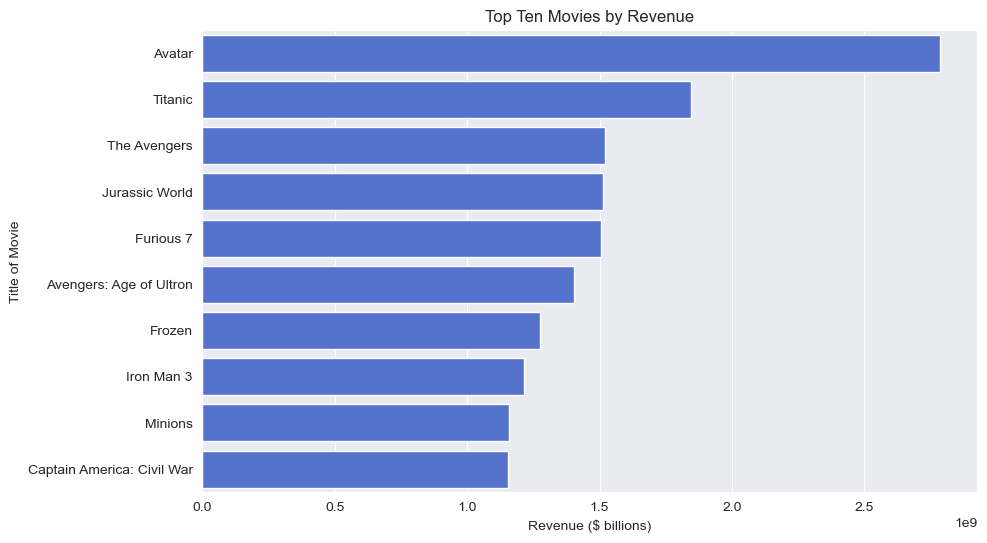

In [263]:
plt.figure(figsize=(10,6))

plt.title("Top Ten Movies by Revenue")
sns.barplot(x=top_ten_revenue['revenue'], y=top_ten_revenue.index, color='royalblue')
plt.xlabel("Revenue ($ billions)")
plt.ylabel("Title of Movie")

__Avatar (2009)__ is the movie with the highest revenue.

The top ten movies by revenue are *Avatar* (2009), *Titanic* (1997), *The Avengers* (2012), *Jurassic World* (2015), *Furious 7* (2015), *Avengers: Age of Ultron* (2015), *Frozen* (2013), *Iron Man 3* (2013), *Minions* (2015), and *Captain America: Civil War* (2016).

It is important to note that throughout the analysis for this project, there has been no adjustment for inflation. As a result, older movies are given less weight, since ticket prices currently cost much more than they did in the past, in addititon to other variables.

***

## Question 2: What was the most expensive movie to make?

To find the most expensive movie, we will need to group by the title of the movie, use the sum aggregate function, and order the budget by descending so the highest numbers appear first.

In [284]:
# Let's find the top 10 most expensive movies then make a bar chart

top_ten_budget = df2.groupby('original_title')[['budget','revenue','profit']].sum().sort_values('budget',ascending=False).iloc[:10,:]
top_ten_budget

,budget,revenue,profit
original_title,,,
Pirates of the Caribbean: On Stranger Tides,380000000,1045713802,665713802
Pirates of the Caribbean: At World's End,300000000,961000000,661000000
Avengers: Age of Ultron,280000000,1405403694,1125403694
Superman Returns,270000000,391081192,121081192
Tangled,260000000,591794936,331794936
John Carter,260000000,284139100,24139100
Spider-Man 3,258000000,890871626,632871626
The Lone Ranger,255000000,89289910,-165710090
Harry Potter and the Half-Blood Prince,250000000,933959197,683959197


Text(0, 0.5, 'Title of Movie')

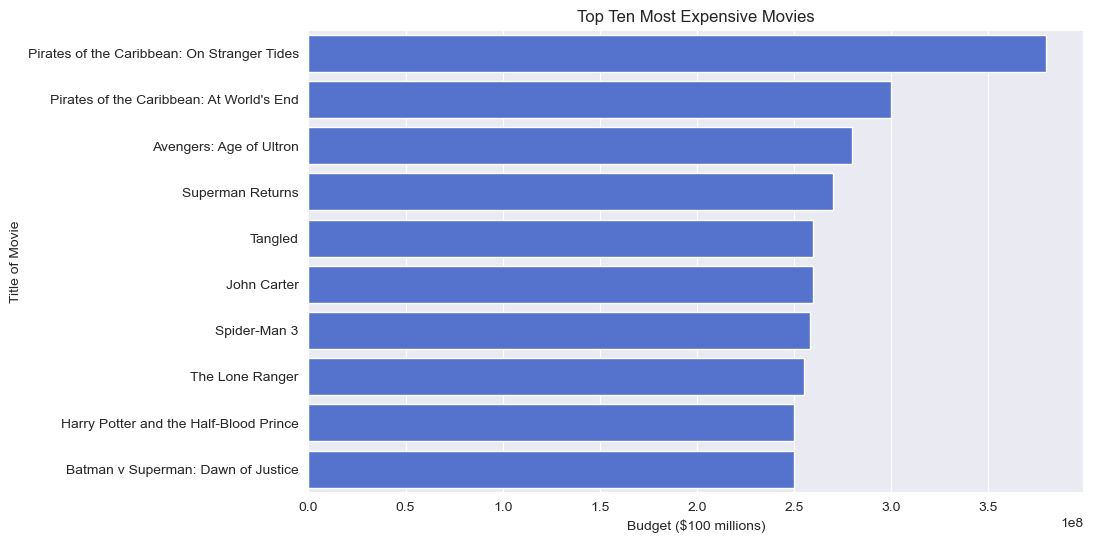

In [266]:
plt.figure(figsize=(10,6))

plt.title("Top Ten Most Expensive Movies")
sns.barplot(x=top_ten_budget['budget'], y=top_ten_budget.index, color='royalblue')
plt.xlabel("Budget ($100 millions)")
plt.ylabel("Title of Movie")

Out of the whole data set, __Pirates of the Caribbean: On Stranger Tides (2011)__ was the most expensive movie to make as it has the highest budget.

The top ten most expensive movies to make (by budget) are *Pirates of the Caribbean: On Stranger Tides* (2011), *Pirates of the Caribbean: At World's End* (2007), *Avengers: Age of Ultron* (2015), *Superman Returns* (2006), *Tangled* (2010), *John Carter* (2012), *Spider-Man 3* (2007), *The Lone Ranger* (2013), *Harry Potter and the Half-Blood Prince* (2009), and *Batman v Superman: Dawn of Justice* (2016).

***

## Question 3: What was the most profitable movie?

For this question, we can solve it similarly to the previous question. We will sort the values by profit in descending order, instead of budget.

In [285]:
# Let's find the top 10 most profitable movies then make a bar chart

top_ten_profit = df2.groupby('original_title')[['budget','revenue','profit']].sum().sort_values('profit',ascending=False).iloc[:10,:]
top_ten_profit

,budget,revenue,profit
original_title,,,
Avatar,237000000,2787965087,2550965087
Titanic,200000000,1845034188,1645034188
Jurassic World,150000000,1513528810,1363528810
Furious 7,190000000,1506249360,1316249360
The Avengers,220000000,1519557910,1299557910
Avengers: Age of Ultron,280000000,1405403694,1125403694
Frozen,150000000,1274219009,1124219009
Minions,74000000,1156730962,1082730962
The Lord of the Rings: The Return of the King,94000000,1118888979,1024888979


Text(0, 0.5, 'Title of Movie')

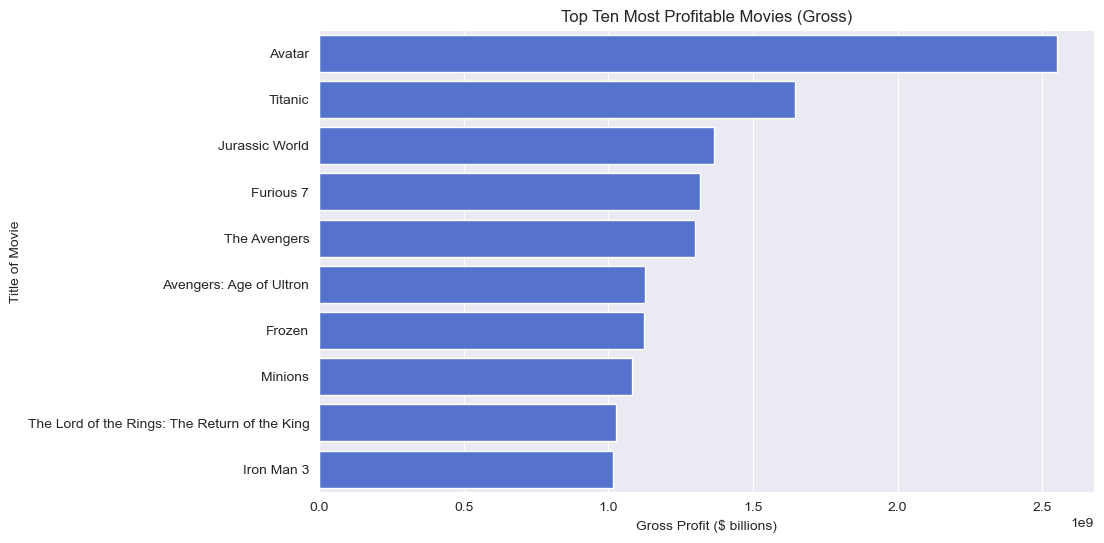

In [110]:
plt.figure(figsize=(10,6))

plt.title("Top Ten Most Profitable Movies (Gross)")
sns.barplot(x=top_ten_profit['profit'], y=top_ten_profit.index, color='royalblue')
plt.xlabel("Gross Profit ($ billions)")
plt.ylabel("Title of Movie")

The most profitable movie is __Avatar (2009)__.

The top ten most profitable movies are *Avatar* (2009), *Titanic* (1997), *Jurassic World* (2015), *Furious 7* (2015), *The Avengers* (2012), *Avengers: Age of Ultron* (2015), *Frozen* (2013), *Minions* (2015), *The Lord of the Rings: The Return of the King* (2003), and *Iron Man 3* (2013).

Not surprisingly, the most profitable movies are similar to the movies with the most revenue.

***

## Question 4: Is there a relationship between budget and profit/revenue? If a movie has a higher budget, will it lead to higher profit and revenue?

In [111]:
# Let's take a closer look at the new columns we formed: profit and profit margin

df2.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,profit,profit_margin
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000,4.803000e+03,3913.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989,5.321560e+07,-inf
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891,1.359677e+08,NaN
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-1.657101e+08,-inf
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000,-7.995375e+05,-83.333333
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000,2.511317e+06,49.975327
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000,5.531286e+07,76.887764
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,2.550965e+09,100.000000


There are some things that do not seem correct with this data. We know the data contains a little over 4800 movies overall, yet the count for profit margin says 3913 (about 81% of total). This means that the movies that are not counted have either \\$0 in revenue or budget (according to the formula we made for profit margin above).

Let's change our data set so that budget is more than \\$0. This can be verified by looking at the data directly, as there are a sizeable number of movies that have a budget of \\$0, likely signifying a data quality issue.

In [112]:
new_budget = df2.query('budget > 0')
new_budget.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,profit,profit_margin
count,3.766000e+03,3766.000000,3766.000000,3.766000e+03,3764.000000,3766.000000,3766.000000,3.766000e+03,3766.000000
mean,3.704284e+07,50257.822623,25.984641,1.039547e+08,109.324389,6.226474,856.496814,6.691189e+07,-inf
std,4.264651e+07,82138.278362,34.438253,1.776399e+08,20.753408,0.966228,1344.785690,1.503957e+08,NaN
min,1.000000e+00,5.000000,0.001586,0.000000e+00,0.000000,0.000000,0.000000,-1.657101e+08,-inf
25%,8.000000e+06,7196.750000,7.974990,6.009736e+06,95.000000,5.700000,114.000000,-4.000000e+06,-103.674947
50%,2.300000e+07,12097.000000,17.604955,3.883137e+07,105.500000,6.300000,365.500000,1.431553e+07,46.453399
75%,5.000000e+07,49523.250000,33.925801,1.220873e+08,120.000000,6.900000,969.250000,7.858474e+07,74.628456
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,2.550965e+09,99.999988


### Relationship between budget and revenue using a scatterplot

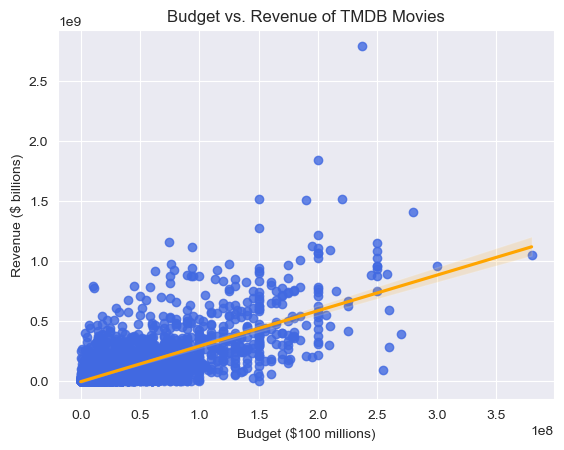

In [113]:
sns.set_style("darkgrid")
sns.regplot(x="budget", y="revenue", data=new_budget, scatter_kws={"color":"royalblue"}, line_kws={"color":"orange"})
plt.title("Budget vs. Revenue of TMDB Movies")
plt.xlabel("Budget ($100 millions)")
plt.ylabel("Revenue ($ billions)");

There is a correlation between budget and revenue. Generally, if a movie has a higher budget, it results in a higher revenue.

### Relationship between budget and profit using a scatterplot

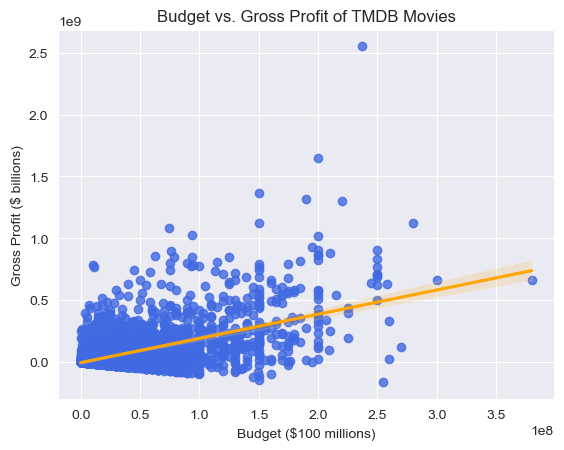

In [114]:
sns.set_style("darkgrid")
sns.regplot(x="budget", y="profit", data=new_budget, scatter_kws={"color":"royalblue"}, line_kws={"color":"orange"})
plt.title("Budget vs. Gross Profit of TMDB Movies")
plt.xlabel("Budget ($100 millions)")
plt.ylabel("Gross Profit ($ billions)");

__There is a correlation between budget and profit. Generally, if a movie has a higher budget, it results in a higher profit.__

***

## Question 5: What are the top movies by score?

### Making score column

To answer this question, we first need to make a column to represent scores.

Although we can use the vote_average column, which represents the average votes a movie received, it would not be fair because a movie that has a 9.0 rating with 10 votes cannot be better than a movie with a 8.0 rating with 100 votes. We can use a weighted rating to help work around this problem.

![](https://image.ibb.co/jYWZp9/wr.png)

For this formula:

- v is the number of votes for the movie
- m is the minimum votes required to be listed in the chart
- R is the average rating of the movie
- C is the mean vote across the whole report

Both v (vote_count) and R (vote_average) are in the data set already.

We can calculate C as:

In [115]:
C = df2['vote_average'].mean()
C

6.092171559442011

The average rating of all movies is about 6 on a scale of 10.

To determine __m__, the minimum votes required to be listed in the chart, we can limit the movies we look at to those with more votes than at least 90% of movies in the list. 

In [116]:
m = df2['vote_count'].quantile(0.9)
m

1838.4000000000015

We can use a filter to get the data we want to look at, which will be movies where the __vote_count__ is greater than or equal to __m__ (the minimum votes required to be listed in the chart)

In [117]:
filtered_movies = df2.copy().loc[df2['vote_count'] >= m]
filtered_movies.shape

(481, 21)

After filtering, we now have __481__ movies in our data. 

Next, we need to make the formula for the score, which we will call __weighted_rating()__. We can do this by making a function.

Afterwards, we will make our __score__ column by applying the function we just made to the filtered dataframe __filtered_movies__. 

In [118]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Weighted rating formula:
    return (v/(v+m) * R) + (m/(m+v) * C)

Make the new column __score__ using the __weighted_rating()__ function.

In [119]:
filtered_movies['score'] = filtered_movies.apply(weighted_rating, axis=1)

Now, we will sort movies by the __score__ in descending order, and then output the data with 4 columns: __original_title__, __vote_count__, __vote_average__, __score__.

In [268]:
filtered_movies = filtered_movies.sort_values('score', ascending=False)

filtered_movies[['original_title', 'release_year', 'vote_count', 'vote_average', 'score']].head(10)

# head(10) gives us the top 10 results

,original_title,release_year,vote_count,vote_average,score
1881,The Shawshank Redemption,1994,8205,8.5,8.059258
662,Fight Club,1999,9413,8.3,7.939256
65,The Dark Knight,2008,12002,8.2,7.920020
3232,Pulp Fiction,1994,8428,8.3,7.904645
96,Inception,2010,13752,8.1,7.863239
3337,The Godfather,1972,5893,8.4,7.851236
95,Interstellar,2014,10867,8.1,7.809479
809,Forrest Gump,1994,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,2003,8064,8.1,7.727243
1990,The Empire Strikes Back,1980,5879,8.2,7.697884


__The Shawshank Redemption (1994)__ has the highest score.

The top 10 movies by score are *The Shawshank Redemption* (1994), *Fight Club* (1999), *The Dark Knight* (2008), *Pulp Fiction*	(1994), *Inception* (2010), *The Godfather* (1972), *Interstellar* (2014), *Forrest Gump* (1994), *The Lord of the Rings: The Return of the King* (2003), and *The Empire Strikes Back* (1980).

Remember that these movies are classified by their score, which we defined using metrics such as the number of votes the movie received, the minimum votes required to be listed in the chart, the average rating of the movie, and the mean vote across the whole report. Also, keep in mind we are looking at the 90th percentile in terms of vote_count. Furthermore, this data is gathered from TMDB, which may not accurately represent the general movie-watching populace.

These movies are not necessarily the "best" movies of all time, since "best" is subjective and varies depending on how one interprets it. The "best" movie could be the one with the most revenue, profit, score, etc. However, these movies are all easily recognizable and many people have seen  and rated them, thus allowing them to place high by score (again, this data is from the votes and ratings given by TMDB users).

Another interesting part of this result is that *none* of these movies, with the exception of *The Lord of the Rings: The Return of the King*, are in the top ten most profitable movies (which we looked at earlier). When compared to the movies with the highest revenue, none of the top scoring movies are seen in that list either. This shows that just because a movie has a high score does mean it will earn a high revenue or profit.

***

## Question 6: Which director makes the movies with the highest average profit?

### Simplifying some columns for analysis

Some columns of our data are in "stringified" lists, so we want to change that to make analysis easier.

For this question, we want the __directors' names__ (in the crew column). In following questions, we will also want the names of __actors__ (in the cast column) as well as __genres__ (in the genres column).

In [121]:
from ast import literal_eval

features = ['cast', 'crew', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(literal_eval)

Now we will get the name of the director from the "crew" column. If the director is not in the column, return NaN.

In [122]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

The columns that have the names of the actors and genres each may have more than 3 elements in them. To make analysis easier, we will return the top 3 elements (for example: the first three actors that appear, or the first three genres).

In [124]:
# If a list has more than three elements, return only the first three. If not, return the entire list.

def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        if len(names) > 3:
            names = names[:3]
        return names
# If data is missing or not useable, return empty list
    return []

Now, let's change the data itself and see what our new columns look like.

In [168]:
# This will simplify the "crew" column so we can get the director

df2['director'] = df2['crew'].apply(get_director)

# This will simplify the "cast" and "genres" columns so we can get the names of the actors and genres, respectively

features = ['cast', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(get_list)

TypeError: string indices must be integers

In [269]:
# Let's look at our new columns 

df2[['original_title', 'director', 'cast', 'genres']].head(3)

,original_title,director,cast,genres
0,Avatar,James Cameron,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,Gore Verbinski,"[Johnny Depp, Orlando Bloom, Keira Knightley]","[Adventure, Fantasy, Action]"
2,Spectre,Sam Mendes,"[Daniel Craig, Christoph Waltz, Léa Seydoux]","[Action, Adventure, Crime]"


### We are ready to answer the original question: Which director has made movies with the highest average profit?

My expectations are that the directors associated with the highest average profits will be notable names such as James Cameron (*Avatar*) and Christopher Nolan (*The Dark Knight Rises*). Will I be right?

In [173]:
# Let's first count the number of times a director has appeared to understand the data a bit more

df2['director'].value_counts()

Steven Spielberg     27
Woody Allen          21
Martin Scorsese      20
Clint Eastwood       20
Ridley Scott         16
                     ..
Timothy Bjorklund     1
Marcus Dunstan        1
Lorene Scafaria       1
Jeff Lowell           1
Brian Herzlinger      1
Name: director, Length: 2349, dtype: int64

The top five counts for directors are all notable. Since they directed more movies than others, will they also be the ones who bring in the highest average profit?

In [186]:
successful_directors = df2

# Ordering by revenue descending

successful_directors.groupby('director')[['revenue', 'profit']].mean().sort_values('revenue', ascending=False).head(5)

,revenue,profit
director,,
Chris Buck,1.274219e+09,1.124219e+09
Kyle Balda,1.156731e+09,1.082731e+09
Lee Unkrich,1.066970e+09,8.669697e+08
Joss Whedon,9.879437e+08,8.082770e+08
Chris Renaud,8.759583e+08,8.009583e+08


Out of the whole data set, __Chris Buck__ is the director who has made the highest average revenue from his movies.

In [176]:
# Ordering by profit descending

successful_directors.groupby('director')[['revenue', 'profit']].mean().sort_values('profit', ascending=False).head(5)

,revenue,profit
director,,
Chris Buck,1.274219e+09,1.124219e+09
Kyle Balda,1.156731e+09,1.082731e+09
Lee Unkrich,1.066970e+09,8.669697e+08
Joss Whedon,9.879437e+08,8.082770e+08
Chris Renaud,8.759583e+08,8.009583e+08


__Chris Buck__ is, on average, the most profitable director.

What movies has Chris Buck made?

In [187]:
successful_directors.loc[successful_directors.director == 'Chris Buck'].sort_values('profit', ascending=False).head(3)

,budget,genres,id,keywords,original_language,original_title,popularity,production_companies,production_countries,release_date,...,title,vote_average,vote_count,title2,cast,crew,profit,profit_margin,release_year,director
124,150000000,"[Animation, Adventure, Family]",109445,"[{""id"": 2011, ""name"": ""queen""}, {""id"": 4344, ""...",en,Frozen,165.125366,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-11-27,...,Frozen,7.3,5295,Frozen,"[Kristen Bell, Idina Menzel, Jonathan Groff]","[{'credit_id': '5336340fc3a3680e960005b9', 'de...",1124219009,88.228083,2013,Chris Buck


Chris Buck directed *Frozen* (2013), an animated movie loved by people of all ages. 

This result comes as a surprise to me because I expected James Cameron or Christopher Nolan to be the most profitable directors on average. While these two directors may place higher when looking at total profit and not average profit, it is still interesting to see a director of animated films to be the highest profitable director on average, since most of top movies by profit are live action. 

***

## Question 7: Which actors bring in the most revenue and profit?

My guess is that the actors with the highest revenue will include stars such as Brad Pitt, Tom Cruise, and Tom Hanks.

In [191]:
# Cast column is separated by commas. We need to group by each actor individually so we will use the "explode()" function
# Notice how for the movie "Avatar" there are 3 records, and each one has a different actor, up to three, which is exactly what we want

updated_cast = df2.explode('cast')
updated_cast.head()

,budget,genres,id,keywords,original_language,original_title,popularity,production_companies,production_countries,release_date,...,title,vote_average,vote_count,title2,cast,crew,profit,profit_margin,release_year,director
0,237000000,"[Action, Adventure, Fantasy]",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,...,Avatar,7.2,11800,Avatar,Sam Worthington,"[{'credit_id': '52fe48009251416c750aca23', 'de...",2550965087,91.499176,2009,James Cameron
0,237000000,"[Action, Adventure, Fantasy]",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,...,Avatar,7.2,11800,Avatar,Zoe Saldana,"[{'credit_id': '52fe48009251416c750aca23', 'de...",2550965087,91.499176,2009,James Cameron
0,237000000,"[Action, Adventure, Fantasy]",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,...,Avatar,7.2,11800,Avatar,Sigourney Weaver,"[{'credit_id': '52fe48009251416c750aca23', 'de...",2550965087,91.499176,2009,James Cameron
1,300000000,"[Adventure, Fantasy, Action]",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,...,Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,Johnny Depp,"[{'credit_id': '52fe4232c3a36847f800b579', 'de...",661000000,68.782518,2007,Gore Verbinski
1,300000000,"[Adventure, Fantasy, Action]",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,...,Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,Orlando Bloom,"[{'credit_id': '52fe4232c3a36847f800b579', 'de...",661000000,68.782518,2007,Gore Verbinski


In [192]:
updated_cast['cast'].value_counts()

Robert De Niro        46
Matt Damon            35
Bruce Willis          35
Samuel L. Jackson     35
Nicolas Cage          34
                      ..
Mykelti Williamson     1
Eddie Albert           1
Paul Anka              1
Arletty                1
Brian Herzlinger       1
Name: cast, Length: 5687, dtype: int64

In [193]:
# This code gives us the top 5 actors by revenue

updated_cast.groupby('cast')[['revenue', 'profit']].sum().sort_values('revenue', ascending=False).head(5)

,revenue,profit
cast,,
Tom Cruise,8381783360,6172983360
Robert Downey Jr.,8140770181,6218970181
Tom Hanks,7886617241,6072617241
Johnny Depp,7874365082,4883865082
Ian McKellen,7854210133,6159210133


The top five actors by revenue are Tom Cruise, Robert Downey Jr., Tom Hanks, Johnny Depp, and Ian McKellen.



In [201]:
# Let's also find the top 5 actors by profit

updated_cast.groupby('cast')[['revenue', 'profit']].sum().sort_values('profit', ascending=False).head(5)

,revenue,profit
cast,,
Robert Downey Jr.,8140770181,6218970181
Tom Cruise,8381783360,6172983360
Ian McKellen,7854210133,6159210133
Tom Hanks,7886617241,6072617241
Will Smith,7407823910,5296723910


The top five actors by profit are Robert Downey Jr., Tom Cruise, Ian McKellen, Tom Hanks, and Will Smith.

So, the actor with the highest revenue is __Tom Cruise__, and the actor with the highest profit is __Robert Downey Jr__.

This comes as a slight surprise. I did not expect Robert Downey Jr. to be included in the top five for either list. Though, he has been an actor for decades and has played a pivotal character, Tony Stark, in the Marvel Cinematic Universe (*Iron Man* and *Avengers* movies, among others).

Note that the data set does not include movies after 2016, so this list may look different as Marvel's *Avengers: Infinity War* (2018) and *Avengers: Endgame* (2019), two of some of the highest grossing films of all time (source: https://www.boxofficemojo.com/chart/top_lifetime_gross/?area=XWW), were released in following years.

If the data set were updated to include movies up to 2019, I would guess that the top five actors by revenue or profit would include other actors who have been in many Marvel movies, such as Chris Evans, Chris Hemsworth, and Scarlett Johansson. 

***

## Question 8: Which genres make the highest revenue and profit?

My guess is that the genre with the highest revenue and profit will be action.

In [ ]:
# Let's use the explode function like we did for the previous question
# We can see for the movie Avatar, it breaks down into three genres: Action, Adventure, and Fantasy

all_genres = df2.explode('genres')
all_genres.head(3)

In [206]:
all_genres['genres'].value_counts()

Drama              2256
Comedy             1669
Action             1129
Thriller           1005
Romance             775
Adventure           755
Crime               617
Horror              501
Science Fiction     413
Family              408
Fantasy             354
Mystery             293
Animation           228
History             172
Music               156
Documentary         110
War                 104
Western              57
Foreign              28
TV Movie              5
Name: genres, dtype: int64

The most common genre is __drama__.

Let's make a bar chart showing the top ten genres by __revenue__.

In [213]:
all_genres['genres'].value_counts().head(10)

Drama              2256
Comedy             1669
Action             1129
Thriller           1005
Romance             775
Adventure           755
Crime               617
Horror              501
Science Fiction     413
Family              408
Name: genres, dtype: int64

In [224]:
top_ten_genres_revenue = all_genres.groupby('genres')[['genres', 'revenue', 'profit']].sum().sort_values('revenue', ascending=False).head(10)
top_ten_genres_revenue

,revenue,profit
genres,,
Action,160448354229,102238947630
Adventure,157031983358,107225747898
Drama,117102116900,71089054743
Comedy,112082996114,72334884305
Thriller,79011464592,49496444706
Fantasy,66829567950,44677871355
Science Fiction,62185240770,41763108713
Family,62021925944,42487583403
Animation,50398947704,35435926648


Text(0, 0.5, 'Genre')

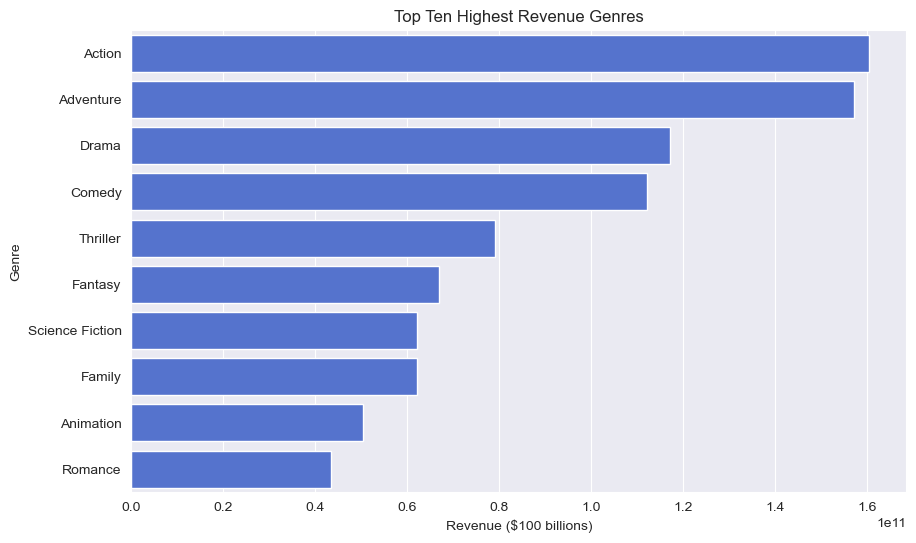

In [225]:
plt.figure(figsize=(10,6))

plt.title("Top Ten Highest Revenue Genres")
sns.barplot(x=top_ten_genres_revenue['revenue'], y=top_ten_genres_revenue.index, color='royalblue')
plt.xlabel("Revenue ($100 billions)")
plt.ylabel("Genre")

It seems that while drama movies may be the most common genre, the genre with the highest revenue is __action__.

Let's make a bar chart showing the top ten genres by __profit__.

In [228]:
top_ten_genres_profit = all_genres.groupby('genres')[['genres', 'revenue', 'profit']].sum().sort_values('profit', ascending=False).head(10)
top_ten_genres_profit

,revenue,profit
genres,,
Adventure,157031983358,107225747898
Action,160448354229,102238947630
Comedy,112082996114,72334884305
Drama,117102116900,71089054743
Thriller,79011464592,49496444706
Fantasy,66829567950,44677871355
Family,62021925944,42487583403
Science Fiction,62185240770,41763108713
Animation,50398947704,35435926648


The most profitable genre is __adventure__.

Text(0, 0.5, 'Genre')

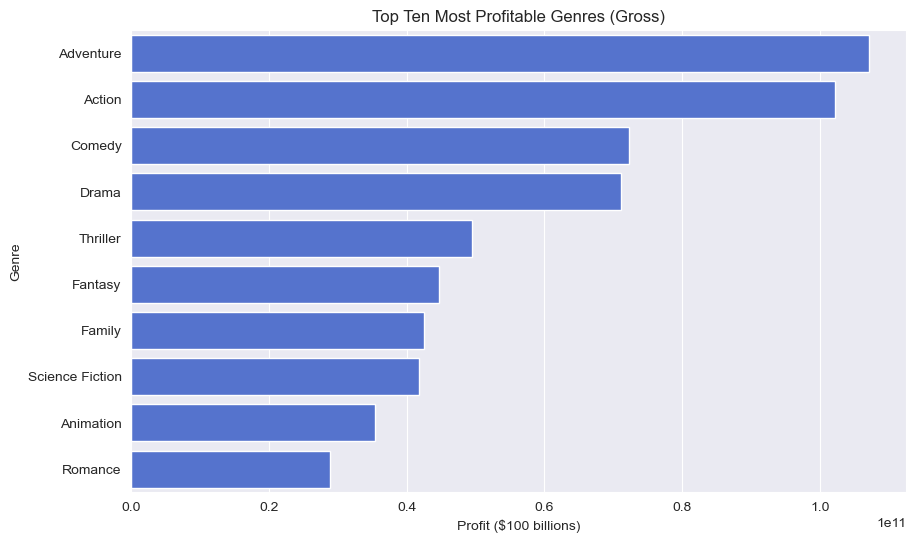

In [230]:
plt.figure(figsize=(10,6))

plt.title("Top Ten Most Profitable Genres (Gross)")
sns.barplot(x=top_ten_genres_profit['profit'], y=top_ten_genres_profit.index, color='royalblue')
plt.xlabel("Profit ($100 billions)")
plt.ylabel("Genre")

The genres with the highest revenue and profit are __action__ and __adventure__, respectively.

This does not seem surprising as action and adventure movies are fun and exciting to watch and appeal to a lot of people. Also, there is overlap as many movies may be both action *and* adventure. 

***

## Conclusion

### Question 1: What is the movie that earned the highest revenue?

__Avatar (2009)__ is the movie with the highest revenue at 2.78 billion USD.	

### Question 2: What was the most expensive movie to make?

__Pirates of the Caribbean: On Stranger Tides (2011)__ was the most expensive movie to make, with a budget of 380,000,000 USD. 

### Question 3: What was the most profitable movie? 

The most profitable movie is __Avatar (2009)__ with 2.55 billion USD. 

### Question 4: Is there a relationship between budget and profit/revenue? If a movie has a higher budget, will it lead to higher profit and revenue?

There is a correlation with budget and profit/revenue. Generally, if a movie has a higher budget, it will have a higher profit/revenue. Though, this is not always the case. 

### Question 5: What are the top movies by score?

The movie with the highest score is __The Shawshank Redemption (1994)__.

The rest of the top ten movies are *Fight Club* (1999), *The Dark Knight* (2008), *Pulp Fiction*	(1994), *Inception* (2010), *The Godfather* (1972), *Interstellar* (2014), *Forrest Gump* (1994), *The Lord of the Rings: The Return of the King* (2003), and *The Empire Strikes Back* (1980).

### Question 6: Which director makes the movies with the highest average profit?

__Chris Buck__, the director of *Frozen* (2013), has the highest average profit.

### Question 7: Which actors bring in the most revenue and profit?

The actor with the highest revenue is __Tom Cruise__, and the actor with the highest profit is __Robert Downey Jr__.

### Question 8: Which genres make the highest revenue and profit?

__Action__ and __adventure__ are the genres with the highest revenue and profit, respectively.

Action has earned 160 billion USD in revenue and adventure has earned 107 billion USD in profit.

(Note that movies can have multiple genres)

### References

1. https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata
2. https://www.boxofficemojo.com/chart/top_lifetime_gross/?area=XWW